In [1]:
#1 school — аббревиатура школы, в которой учится ученик
#2 sex — пол ученика ('F' - женский, 'M' - мужской)
#3 age — возраст ученика (от 15 до 22)
#4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
#5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
#6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
#7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
#11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
#12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
#13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
#14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
#15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
#16 schoolsup — дополнительная образовательная поддержка (yes или no)
#17 famsup — семейная образовательная поддержка (yes или no)
#18 paid — дополнительные платные занятия по математике (yes или no)
#19 activities — дополнительные внеучебные занятия (yes или no)
#20 nursery — посещал детский сад (yes или no)
#21 higher — хочет получить высшее образование (yes или no)
#22 internet — наличие интернета дома (yes или no)
#23 romantic — в романтических отношениях (yes или no)
#24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
#25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
#26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
#27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
#28 absences — количество пропущенных занятий
#29 score — баллы по госэкзамену по математике

In [2]:
#Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

#И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). 
#Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 
    #Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
    #Посмотрите на распределение признака для числовых переменных, устраните выбросы.
    #Оцените количество уникальных значений для номинативных переменных.
    #По необходимости преобразуйте данные
    #Проведите корреляционный анализ количественных переменных
    #Отберите не коррелирующие переменные.
    #Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
    #Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np
from scipy.stats import t
from statsmodels.stats import weightstats 
import plotly as py
import plotly.graph_objects as go

In [4]:

df=pd.read_csv('stud_math.csv') 

In [5]:
display(df.head(10))
df.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,...,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,...,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,...,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,...,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,...,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
#определим количество пропусков данных в процентах
for col in df.columns:
    pct_missing = df[col].isna().mean()
    print(f'{col} - {pct_missing :.1%}')

school - 0.0%
sex - 0.0%
age - 0.0%
address - 4.3%
famsize - 6.8%
Pstatus - 11.4%
Medu - 0.8%
Fedu - 6.1%
Mjob - 4.8%
Fjob - 9.1%
reason - 4.3%
guardian - 7.8%
traveltime - 7.1%
studytime - 1.8%
failures - 5.6%
schoolsup - 2.3%
famsup - 9.9%
paid - 10.1%
activities - 3.5%
nursery - 4.1%
studytime, granular - 1.8%
higher - 5.1%
internet - 8.6%
romantic - 7.8%
famrel - 6.8%
freetime - 2.8%
goout - 2.0%
health - 3.8%
absences - 3.0%
score - 1.5%


In [7]:
df.describe(include='object')

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,378,368,350,376,359,378,364,386,356,355,381,379,375,361,364
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,295,261,314,133,197,137,250,335,219,200,195,300,356,305,240


In [8]:
#отделим столбцы, где количество уникальных значений равно 2 и не равно 2 
binary_cols = list(df.describe(include='object').loc['unique'][df.describe(include='object').loc['unique'] == 2].index)
non_binary_cols = list(df.describe(include='object').loc['unique'][df.describe(include='object').loc['unique'] != 2].index)

In [9]:
#производим замену недостающих значений на значение моды.
modes = dict(zip(binary_cols,df[binary_cols].mode().values.tolist()[0]))
df.fillna(value=modes, inplace=True)
df[binary_cols].apply(lambda col: col.unique())

,school,sex,address,famsize,Pstatus,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,yes,no,no,no,yes,yes,yes,no
1,MS,M,R,LE3,T,no,yes,yes,yes,no,no,no,yes


In [10]:
#производим замену недостающих значений на значение моды.
modes2 = dict(zip(non_binary_cols,df[non_binary_cols].mode().values.tolist()[0]))
df.fillna(value = modes2, inplace = True)



In [11]:
df[non_binary_cols].mode()

,Mjob,Fjob,reason,guardian
0,other,other,course,mother


In [12]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              395 non-null    object 
 4   famsize              395 non-null    object 
 5   Pstatus              395 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 395 non-null    object 
 9   Fjob                 395 non-null    object 
 10  reason               395 non-null    object 
 11  guardian             395 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            395 non-null    obj

In [14]:
binary_cols = list(df.describe(include='object').loc['unique'][df.describe(include='object').loc['unique'] == 2].index)

In [15]:
quants = list(df.describe(include=['float64', 'int64']).columns)


In [16]:
df.score.fillna(df['score'].median(), inplace=True)
df.score.fillna(df['score'].median()).isna().sum()


0

count    395.000000
mean      52.303797
std       22.746314
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

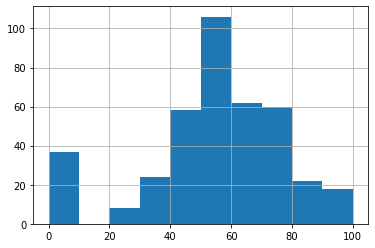

In [17]:
df.score.hist()
df.score.describe()

In [18]:
#Данные не содержат выбросов, находятся в диапазоне от 0-100

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

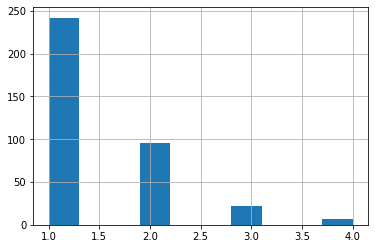

In [19]:
df.traveltime.hist()
df.traveltime.describe() 

In [20]:
df.traveltime.fillna(df['traveltime'].median(), inplace=True)
df.traveltime.fillna(df['traveltime'].median()).isna().sum()

0

In [21]:
#Данные не содержат выбросов, находятся в диапазоне от 0-4

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

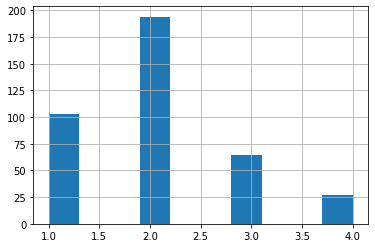

In [22]:
df.studytime.hist()
df.studytime.describe() 

In [23]:
#Данные не содержат выбросов, находятся в диапазоне от 0-4

In [24]:
df.studytime.fillna(df['studytime'].median(), inplace=True)
df.studytime.fillna(df['studytime'].median()).isna().sum()

0

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

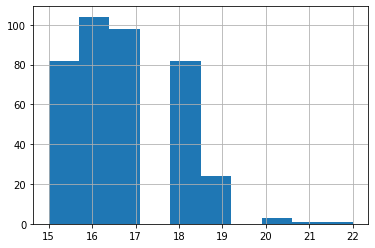

In [25]:
df.age.hist()
df.age.describe()

In [26]:
df.Medu.fillna(df['Medu'].median(), inplace=True)
df.Medu.fillna(df['Medu'].median()).isna().sum()

0

count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

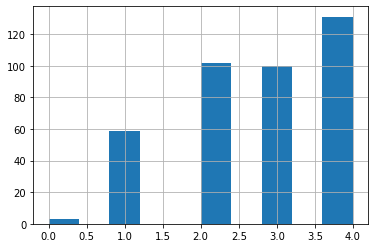

In [27]:
df.Medu.hist()
df.Medu.describe()

In [28]:
df.Fedu.fillna(df['Fedu'].median(), inplace=True)
df.Fedu.fillna(df['Fedu'].median()).isna().sum()

0

count    395.000000
mean       2.577215
std        2.164782
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

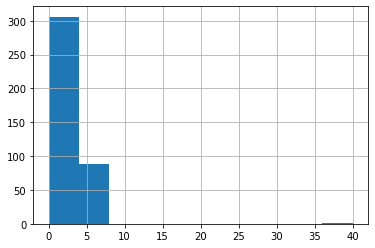

In [29]:
df.Fedu.hist()
df.Fedu.describe()

In [30]:
#Данные содержат выброс = 40, так как все данные в диапазоне от 0-4, полагаю что 40 это опечатка и заменяю на 4.

def fill_Fedu(row):  
  if row['Fedu'] == 40:
    return row['Fedu']/10
  else:
    return row['Fedu']

new_Fedu=df.apply(lambda row: fill_Fedu(row), axis=1)
df['Fedu'] = new_Fedu

count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

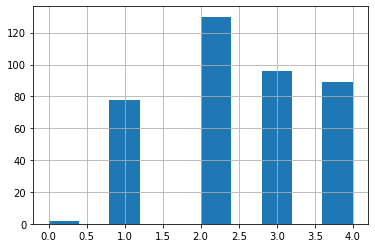

In [31]:
df.Fedu.hist()
df.Fedu.describe()

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


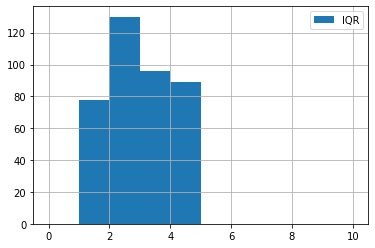

In [32]:
IQR = df.Fedu.quantile(0.75) - df.Fedu.quantile(0.25)
perc25 = df.Fedu.quantile(0.25)
perc75 = df.Fedu.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.Fedu.loc[df.Fedu.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 10, range = (0, 10), label = 'IQR')
 
plt.legend();

In [33]:
df = df.loc[df.Fedu <= 4.5]

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

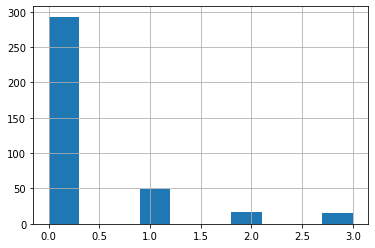

In [35]:
df.failures.hist()
df.failures.describe() 
#выбросов нет

In [36]:
df.failures.fillna(df['failures'].median(), inplace=True)
df.failures.fillna(df['failures'].median()).isna().sum()

0

count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

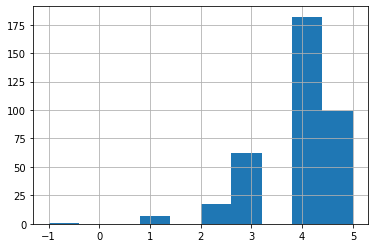

In [37]:
df.famrel.hist()
df.famrel.describe() 
#Содержит выброс ="-1", так как данные находятся в диапазоне от 1-5, счтаю -1 опечаткой и меняю на 1

In [38]:

def fill_famrel(row):  
  if row['famrel'] == -1:
    return 1
  else:
    return row['famrel']

new_famrel=df.apply(lambda row: fill_famrel(row), axis=1)
df['famrel'] = new_famrel

count    368.000000
mean       3.942935
std        0.903824
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

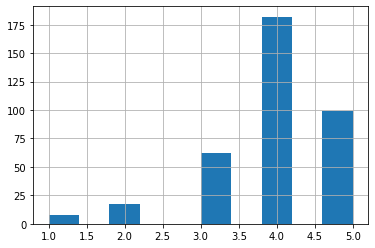

In [39]:
df.famrel.hist()
df.famrel.describe() 


In [40]:
df.famrel.fillna(df['famrel'].median(), inplace=True)
df.famrel.fillna(df['famrel'].median()).isna().sum()

0

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

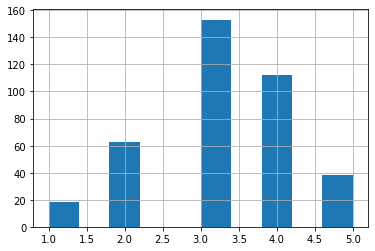

In [42]:
df.freetime.hist()
df.freetime.describe() 

In [43]:
df.freetime.fillna(df['freetime'].median(), inplace=True)
df.freetime.fillna(df['freetime'].median()).isna().sum()

0

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

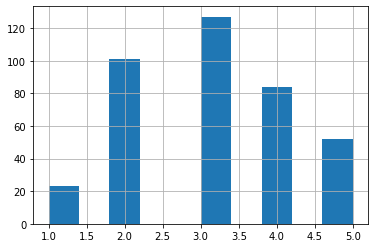

In [44]:
df.goout.hist()
df.goout.describe() 

In [45]:
df.goout.fillna(df['goout'].median(), inplace=True)
df.goout.fillna(df['goout'].median()).isna().sum()

0

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

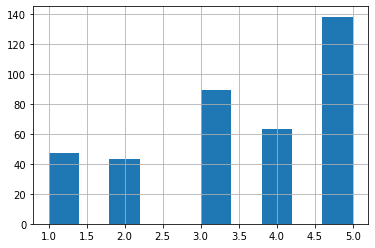

In [46]:
df.health.hist()
df.health.describe() 

In [47]:
df.health.fillna(df['health'].median(), inplace=True)
df.health.fillna(df['health'].median()).isna().sum()

0

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

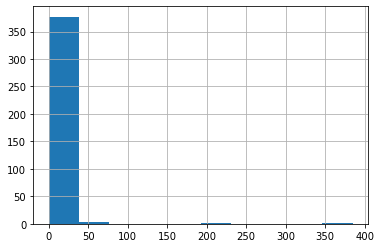

In [48]:
df.absences.hist()
df.absences.describe() 

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


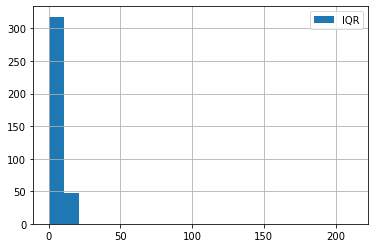

In [49]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.absences.loc[df.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, range = (0, 212), label = 'IQR')
 
plt.legend();

In [50]:
df.absences =df.absences.loc[df.absences <= 20]

In [51]:
df.absences.fillna(df['absences'].median(), inplace=True)
df.absences.fillna(df['absences'].median()).isna().sum()

0

In [52]:
df.select_dtypes(['float64', 'int64']).corr()


,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.161375,-0.154781,0.084755,-0.015355,0.228081,0.015556,0.065250,0.026443,0.134069,-0.063892,0.141065,-0.151150
Medu,-0.161375,1.000000,0.593116,-0.160877,0.077050,-0.245110,-0.077638,-0.013853,0.026210,0.063361,-0.050991,0.062010,0.205568
Fedu,-0.154781,0.593116,1.000000,-0.120629,0.007754,-0.260690,-0.007778,-0.024077,-0.029868,0.039084,0.006132,-0.027690,0.122642
traveltime,0.084755,-0.160877,-0.120629,1.000000,-0.094637,0.049670,0.095724,-0.019040,-0.012496,0.051775,-0.044842,-0.036046,-0.055243
studytime,-0.015355,0.077050,0.007754,-0.094637,1.000000,-0.166598,-1.000000,0.037638,-0.119014,-0.051090,-0.073674,-0.074658,0.114371
failures,0.228081,-0.245110,-0.260690,0.049670,-0.166598,1.000000,0.168020,-0.017230,0.094826,0.113649,0.075849,0.079299,-0.326532
"studytime, granular",0.015556,-0.077638,-0.007778,0.095724,-1.000000,0.168020,1.000000,-0.038152,0.120774,0.051585,0.074240,0.074923,-0.115841
famrel,0.065250,-0.013853,-0.024077,-0.019040,0.037638,-0.017230,-0.038152,1.000000,0.165324,0.074217,0.085947,-0.081067,0.053510
freetime,0.026443,0.026210,-0.029868,-0.012496,-0.119014,0.094826,0.120774,0.165324,1.000000,0.292305,0.060557,0.086704,0.018200
goout,0.134069,0.063361,0.039084,0.051775,-0.051090,0.113649,0.051585,0.074217,0.292305,1.000000,-0.014274,0.103337,-0.125708


In [54]:
#Так как переменные studytime и studytime, granular скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная studytime, granular.
df.drop(['studytime, granular'], inplace = True, axis = 1)

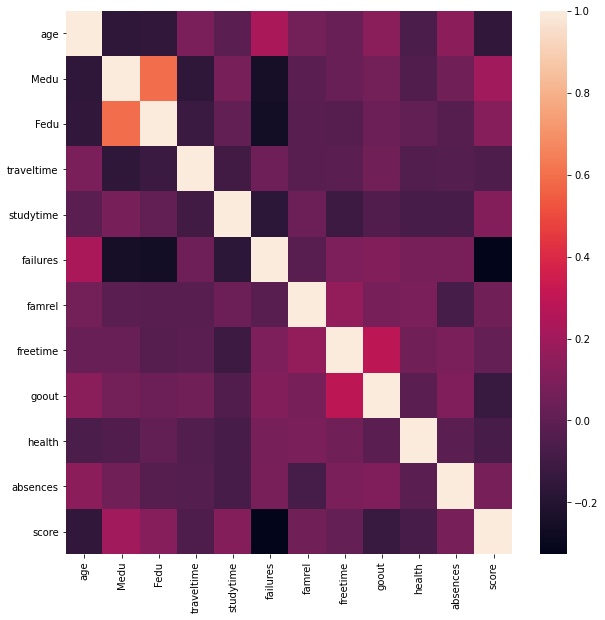

In [55]:
sns.heatmap(df.select_dtypes(['float64', 'int64']).corr())
fig=plt.gcf()
fig.set_size_inches(10,10)

In [56]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

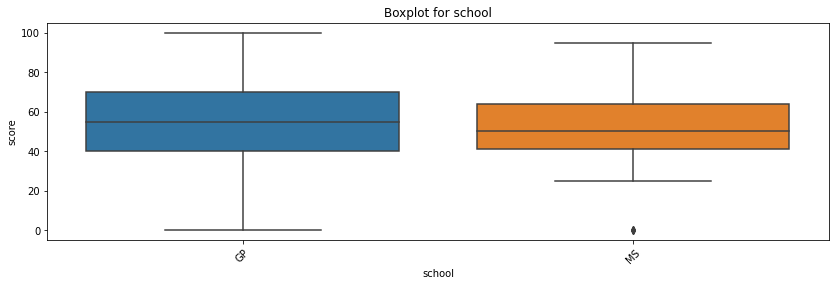

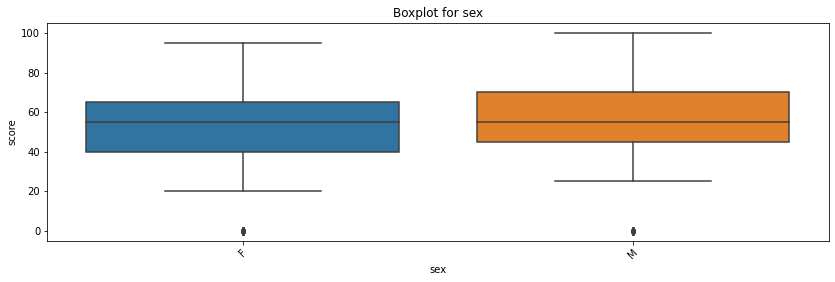

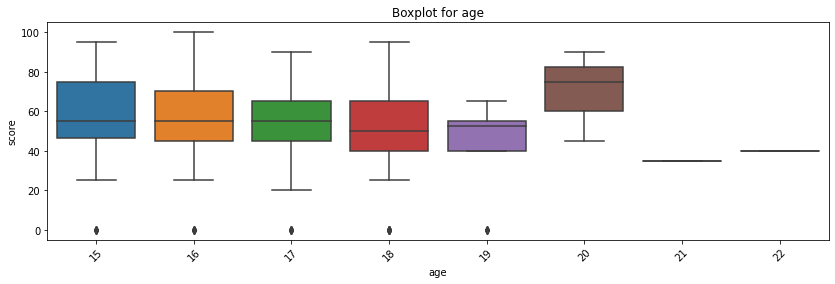

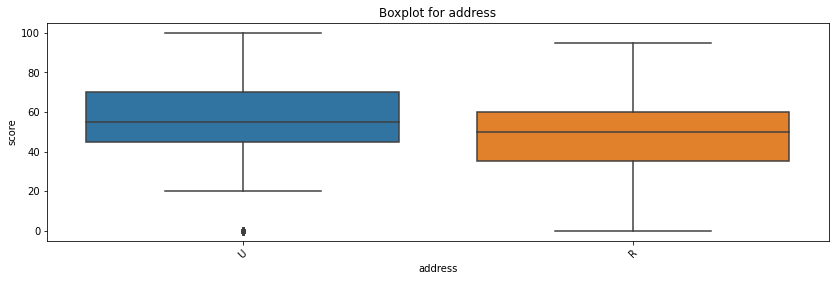

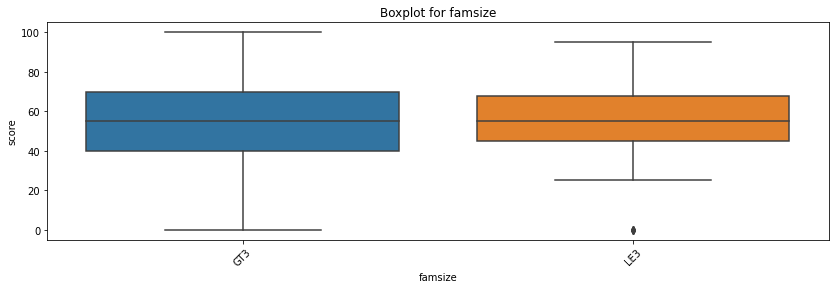

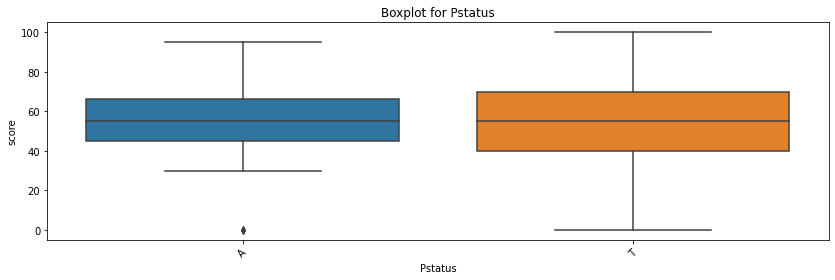

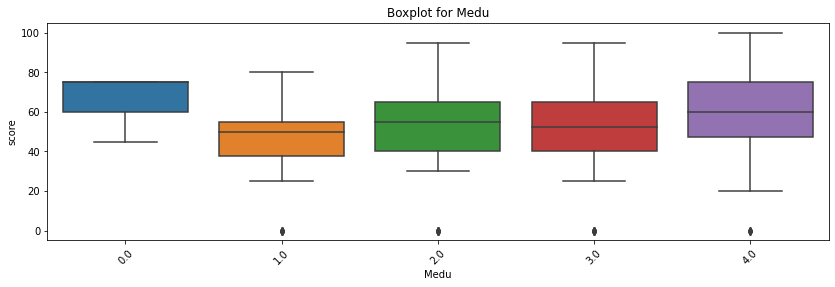

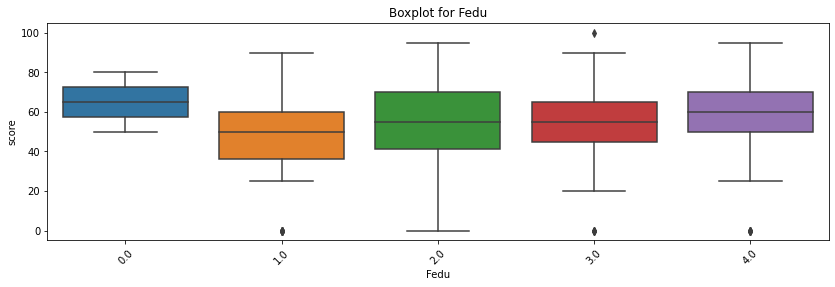

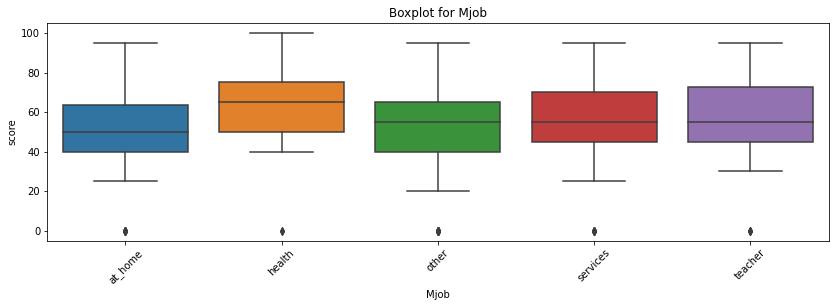

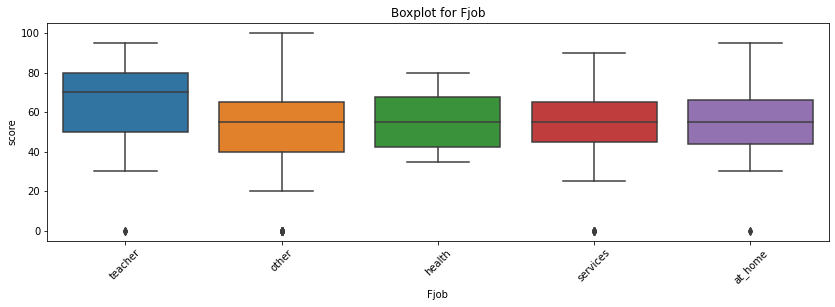

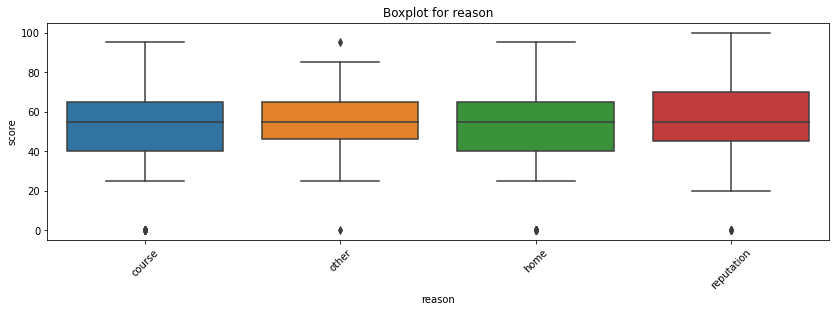

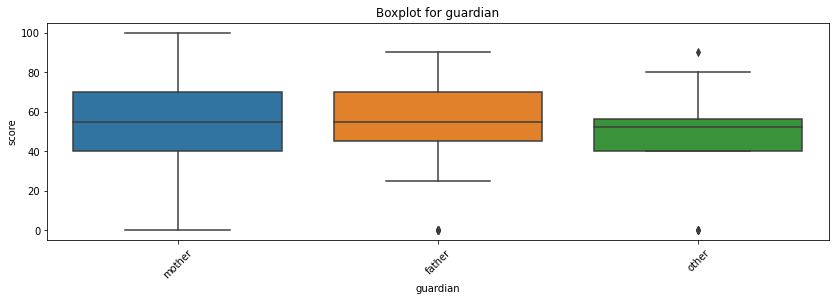

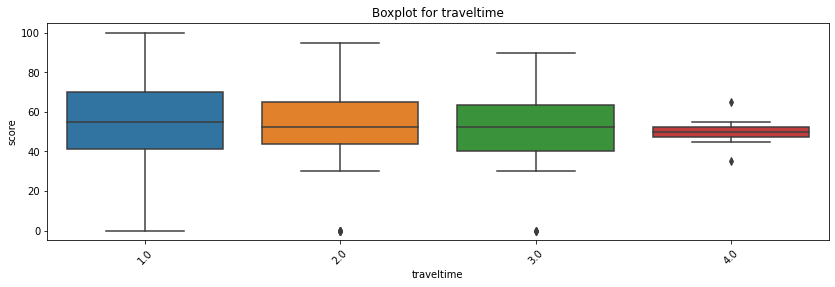

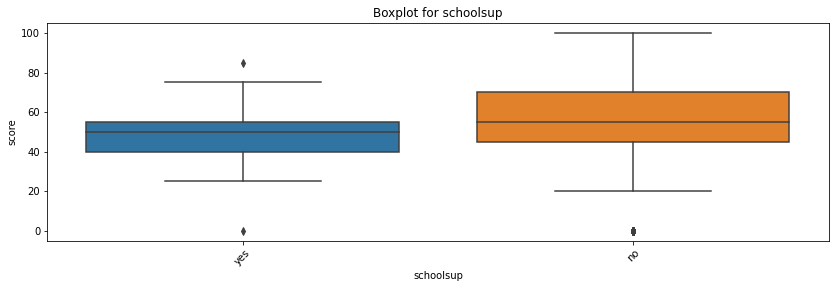

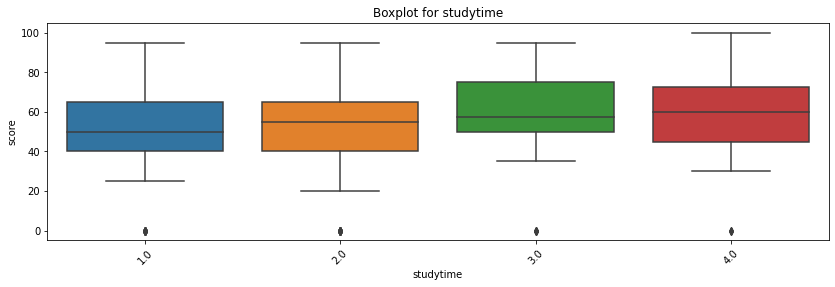

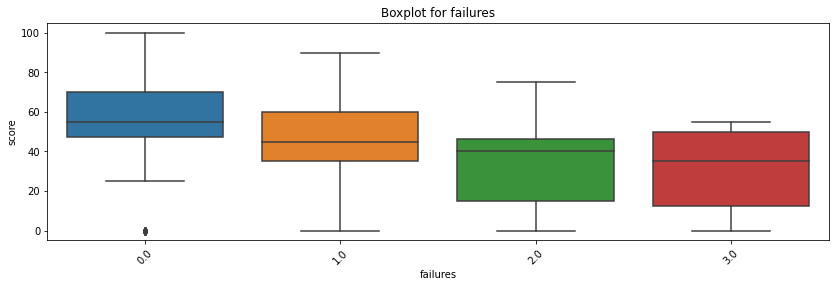

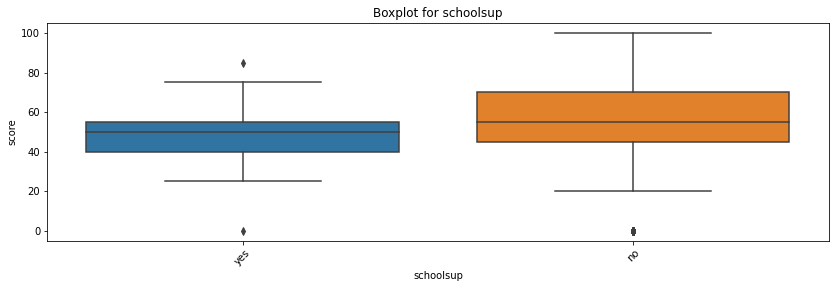

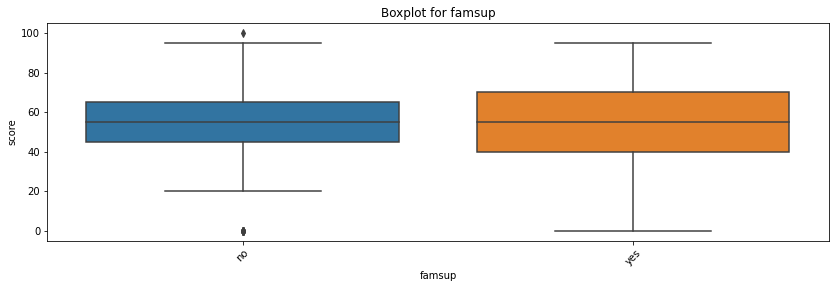

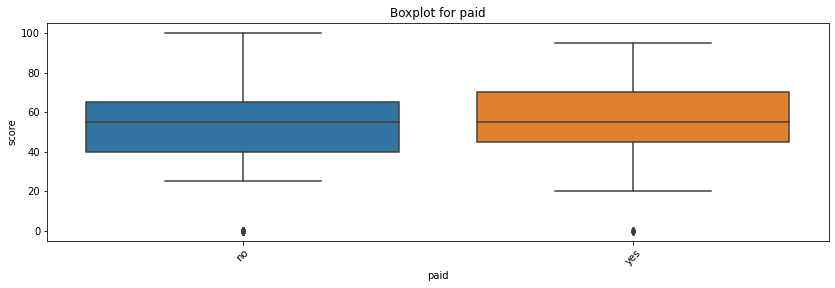

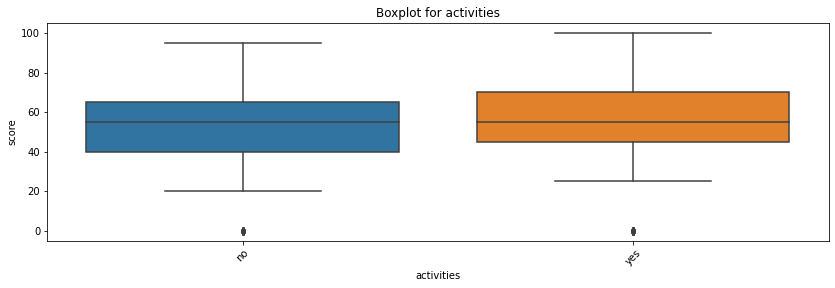

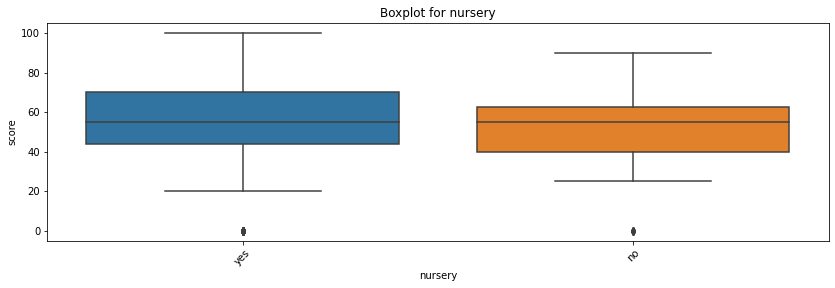

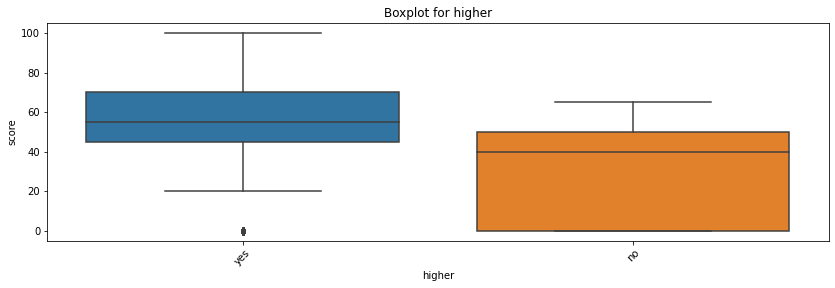

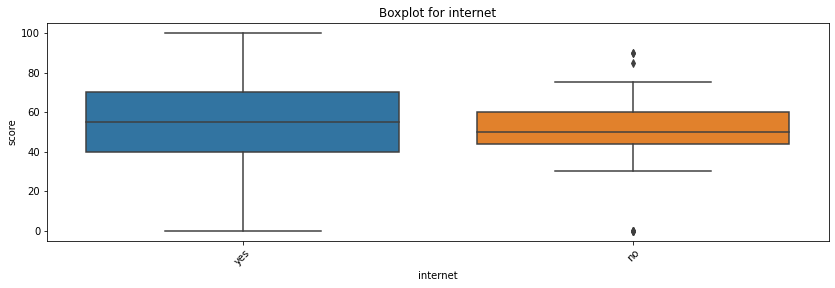

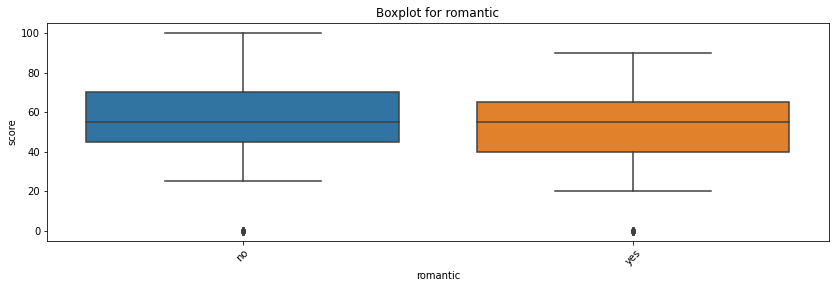

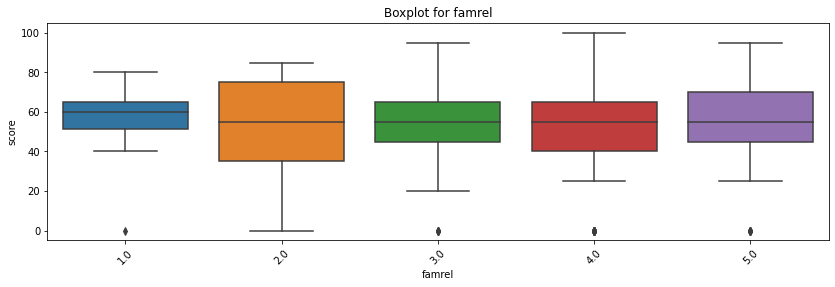

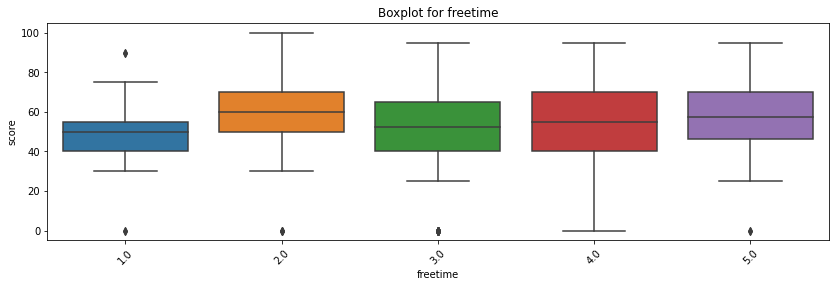

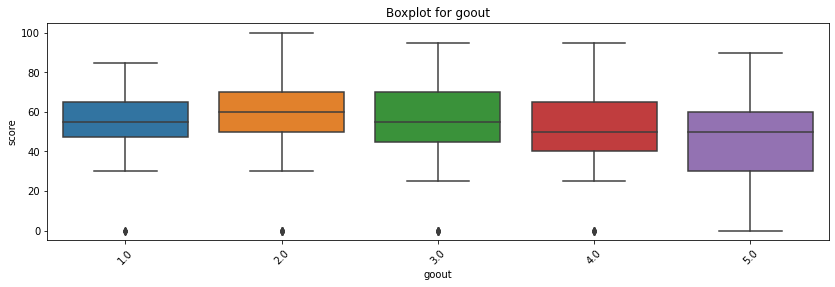

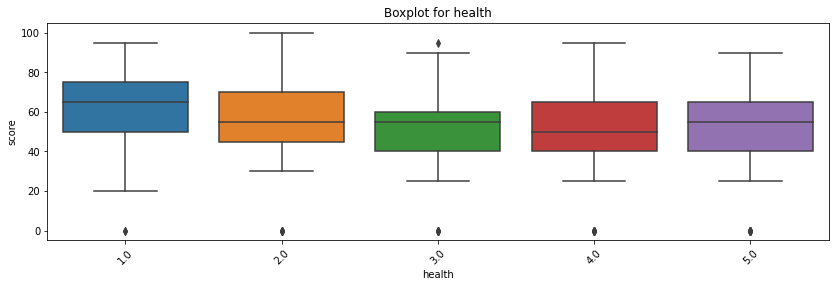

In [57]:
for col in ['school' ,'sex' ,'age','address' ,'famsize','Pstatus' ,'Medu' ,'Fedu' ,'Mjob' ,'Fjob' ,'reason','guardian','traveltime','schoolsup','studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities','nursery','higher' ,'internet','romantic','famrel','freetime' ,'goout','health'  ]:
    get_boxplot(col)

In [58]:
По графикам похоже, что все параметры, кроме 'sex','famsize','Pstatus','guardian','famsup','paid','activities','nursery','romantic','famrel' могут влиять на баллы по экзамену. 
Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. 
Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
Проверим нулевую гипотезу о том, что распределения полученных баллов по различным параметрам неразличимы:

SyntaxError: invalid syntax (<ipython-input-58-32c1a6b70fa5>, line 1)

In [59]:

def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[::]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                       df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [60]:
for col in ['school','age','address','Medu' ,'Fedu' ,'Mjob' ,'Fjob' ,'reason','guardian','traveltime','schoolsup','studytime', 'failures', 'schoolsup', 'paid','higher' ,'internet','romantic','famrel','freetime' ,'goout','health' ]:
    get_stat_dif(col)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3583: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [ ]:
#Как мы видим, серьёзно отличаются шесть параметров: address, Medu, Mjob, failures, higher, romantic. 
#Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это:  address, Medu, Mjob, failures, higher, romantic.

In [61]:
df_model = df.loc[:, ['address', 'Medu', 'Mjob', 'failures', 'higher', 'romantic']]
df_model.head()

,address,Medu,Mjob,failures,higher,romantic
0,U,4.0,at_home,0.0,yes,no
1,U,1.0,at_home,0.0,yes,no
2,U,1.0,at_home,3.0,yes,no
3,U,4.0,health,0.0,yes,yes
4,U,3.0,other,0.0,yes,no


In [ ]:
#Выводы:
    #В данных достаточно мало пустых значений, не более 10%.
    #Выбросы найдены только в столбцах с образованием отца, семейные отношения и количество пропущенных занятий, что позволяет сделать вывод о том, что данные достаточно чистые.
    #Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это address, Medu, Mjob, failures, higher, romantic.
